In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

In [100]:
data = pd.read_csv("salary_data.csv", skipinitialspace=True)
data = data[["Experience_Year", "Salary"]]
print(data)

    Experience_Year  Salary
0                 2      10
1                 4      15
2                 1       7
3                 4      13
4                 3      11
5                 4      15
6                12      40
7                 6      18
8                 5      20
9                11      39
10                9      35
11                7      21
12                9      24
13               10      30
14                6      27


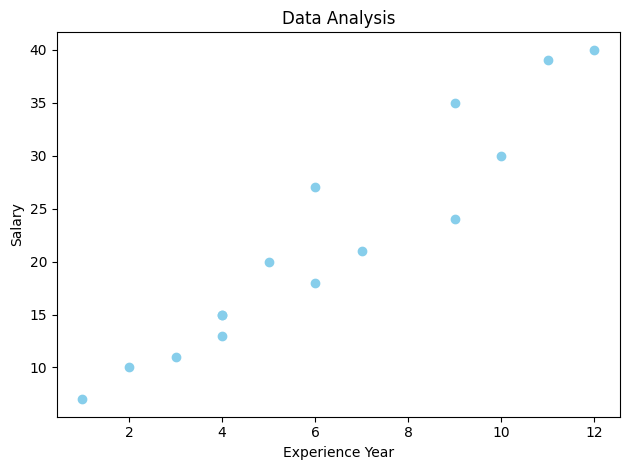

In [101]:
plt.scatter(data["Experience_Year"], data["Salary"], color="skyblue")
plt.title("Data Analysis")
plt.xlabel("Experience Year")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

In [102]:
X = data[["Experience_Year"]]
y = data["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
print(f"Slope w: {model.coef_[0]:.2f}")
print(f"Bias b: {model.intercept_:.2f}")

Slope w: 2.92
Bias b: 3.47


In [104]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is: {mse:.2f}")
print(f"R^2 Score is: {r2:.2f}")

MSE is: 6.82
R^2 Score is: 0.95


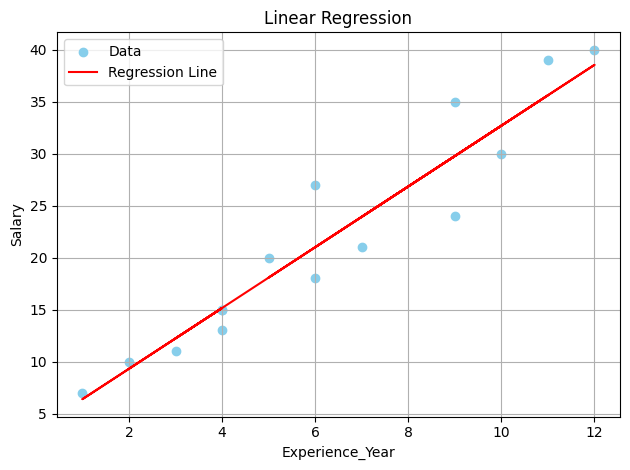

In [105]:
plt.scatter(X, y , color="skyblue", label="Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.title("Linear Regression")
plt.xlabel("Experience_Year")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [106]:
experience_year = 8
predicted_salary = model.predict([[experience_year]])
print(f"{predicted_salary[0]:.2f}")

26.85


c:\Users\TUAN NGOC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [107]:
new_data = pd.DataFrame({
    "Experience_Year": [2, 11, 3, 11, 2, 12, 3, 8, 2, 9, 3, 12, 8, 4, 6, 5],
    "Salary": [39, 14, 34, 19, 40, 22, 31, 19, 10, 29, 12, 40, 25, 14, 16, 14]
})

data_noisy = pd.concat([data, new_data], ignore_index=True)
print(data_noisy.tail())

    Experience_Year  Salary
26               12      40
27                8      25
28                4      14
29                6      16
30                5      14


In [108]:
X = data_noisy[["Experience_Year"]]
y = data_noisy["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


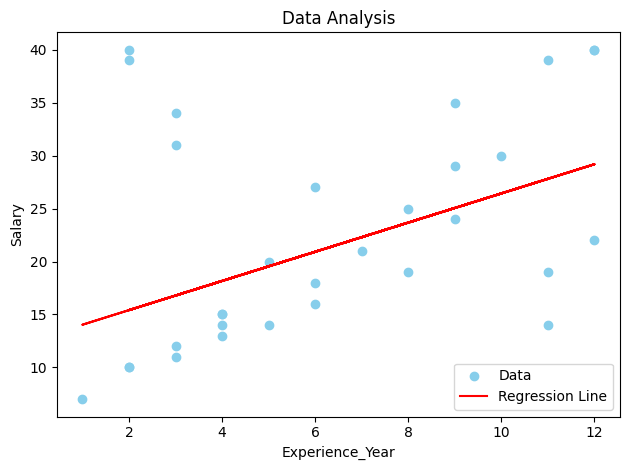

In [109]:
plt.scatter(X, y, color="skyblue", label="Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.title("Data Analysis")
plt.xlabel("Experience_Year")
plt.ylabel("Salary")
plt.legend()
plt.tight_layout()
plt.show()

In [110]:
print(f"Slope w: {model.coef_[0]:.2f}")
print(f"Bias b: {model.intercept_:.2f}")

Slope w: 1.38
Bias b: 12.65


In [111]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is: {mse:.2f}")
print(f"R^2 Score is: {r2:.2f}")

MSE is: 147.64
R^2 Score is: -0.30


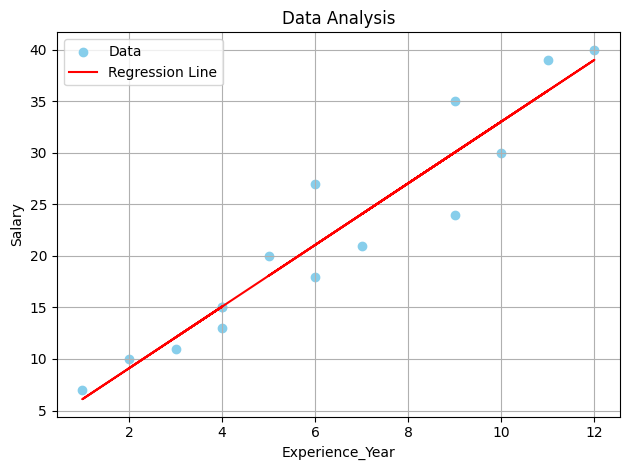

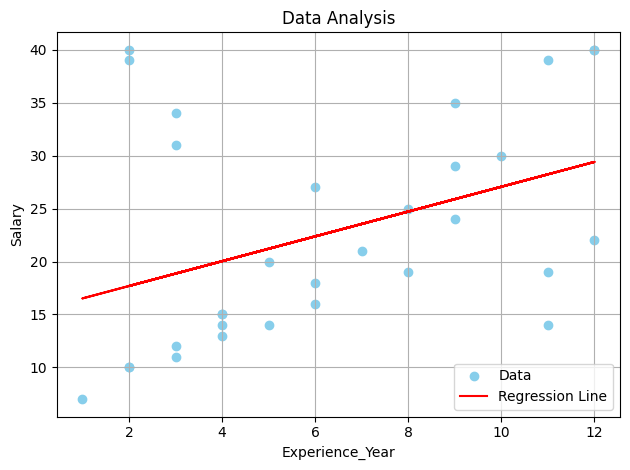

In [112]:
original_data = pd.read_csv("salary_data.csv", skipinitialspace=True)

data_noisy = pd.concat([data, new_data], ignore_index=True)

def plot_model(input_data, title):
    X = input_data[["Experience_Year"]]
    y = input_data["Salary"]

    model = LinearRegression()
    model.fit(X, y)

    plt.scatter(X, y, color="skyblue", label="Data")
    plt.plot(X, model.predict(X), color="red", label="Regression Line")
    plt.title("Data Analysis")
    plt.xlabel("Experience_Year")
    plt.ylabel("Salary")
    plt.grid((True))
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_model(original_data, "Data Before Confusion")
plot_model(data_noisy, "Data After Confusion")

In [113]:
z_score = zscore(data_noisy[["Experience_Year", "Salary"]])
outliers = (abs(z_score) > 2.5).any(axis=1)
print(data_noisy[outliers])

Empty DataFrame
Columns: [Experience_Year, Salary]
Index: []


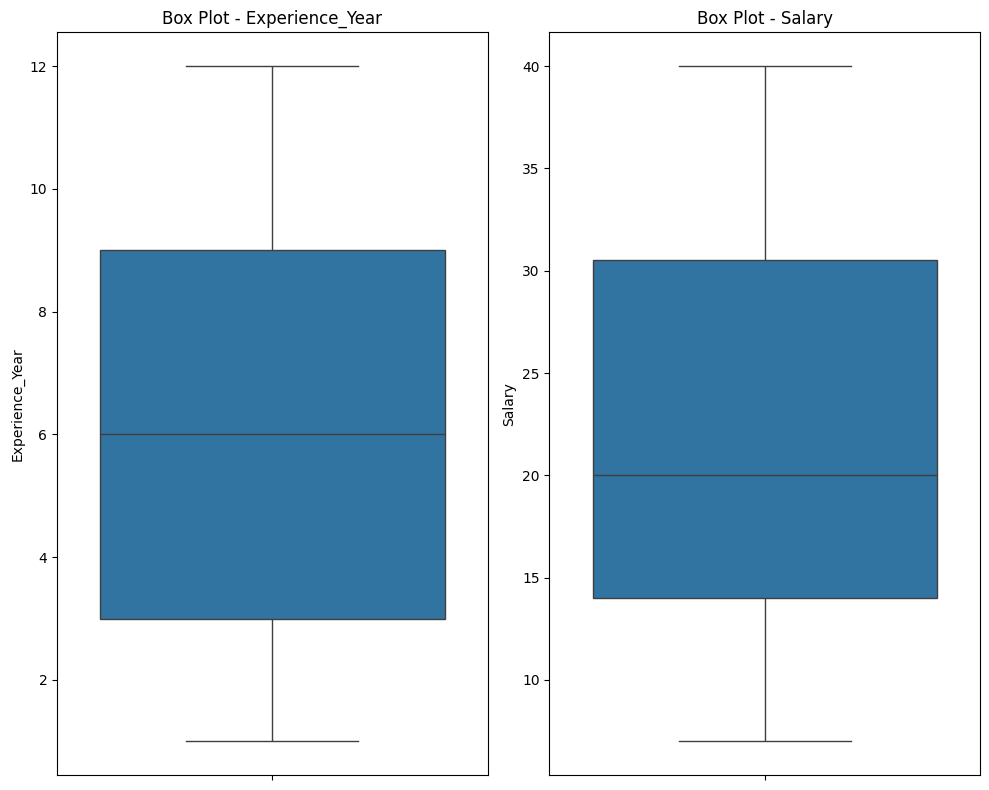

In [114]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.boxplot(y=data_noisy["Experience_Year"])
plt.title("Box Plot - Experience_Year")

plt.subplot(1, 2, 2)
sns.boxplot(y=data_noisy["Salary"])
plt.title("Box Plot - Salary")

plt.tight_layout()
plt.show()

In [115]:
mean_exp_year = data_noisy["Experience_Year"].mean()
std_exp_year = data_noisy["Experience_Year"].std()

data_noisy["Z_exp_year"] = (data_noisy["Experience_Year"] - mean_exp_year) / std_exp_year
print(data_noisy["Z_exp_year"])

0    -1.202863
1    -0.637882
2    -1.485354
3    -0.637882
4    -0.920373
5    -0.637882
6     1.622043
7    -0.072901
8    -0.355391
9     1.339552
10    0.774571
11    0.209590
12    0.774571
13    1.057062
14   -0.072901
15   -1.202863
16    1.339552
17   -0.920373
18    1.339552
19   -1.202863
20    1.622043
21   -0.920373
22    0.492080
23   -1.202863
24    0.774571
25   -0.920373
26    1.622043
27    0.492080
28   -0.637882
29   -0.072901
30   -0.355391
Name: Z_exp_year, dtype: float64


In [116]:
mean_salary = data_noisy["Salary"].mean()
std_salary = data_noisy["Salary"].std()

data_noisy["Z_salary"] = (data_noisy["Salary"] - mean_salary) / std_salary
print(data_noisy["Z_salary"])

0    -1.215993
1    -0.736403
2    -1.503747
3    -0.928239
4    -1.120075
5    -0.736403
6     1.661548
7    -0.448649
8    -0.256813
9     1.565630
10    1.181958
11   -0.160895
12    0.126859
13    0.702368
14    0.414613
15    1.565630
16   -0.832321
17    1.086040
18   -0.352731
19    1.661548
20   -0.064977
21    0.798286
22   -0.352731
23   -1.215993
24    0.606449
25   -1.024157
26    1.661548
27    0.222777
28   -0.832321
29   -0.640485
30   -0.832321
Name: Z_salary, dtype: float64


In [117]:
condition = (abs(data_noisy["Z_exp_year"]) > 2.5) | (abs(data_noisy["Z_salary"]) > 2.5)
outliers = data_noisy[condition]
print(outliers)

Empty DataFrame
Columns: [Experience_Year, Salary, Z_exp_year, Z_salary]
Index: []
